Name: Madhusudan Hasbe\
PRN: 22070126061\
TY AIML A3

# ASSIGNMENT 9
---------

# LSTM for text classfication dataset from Kaggle

### Objectives:
1. Study the LSTM.
2. Implement the same for text classification dataset.

### Theory:
### Long Short-Term Memory (LSTM) Networks

**Long Short-Term Memory (LSTM)** networks are a special kind of Recurrent Neural Network (RNN) designed to capture long-term dependencies in sequence data. Standard RNNs struggle with learning from long sequences due to the vanishing and exploding gradient problems. LSTMs, introduced by Hochreiter and Schmidhuber in 1997, address these issues by incorporating a memory cell structure that can retain information for long periods.

#### Key Concepts of LSTM

1. **Memory Cell**:  
   The memory cell is the core of the LSTM network. It maintains information over time and decides when to add new information and when to forget old information using specific gates.

2. **Gates in LSTM**:
   - **Forget Gate**: Decides which part of the previous cell state to forget. The gate outputs a number between 0 and 1, where 1 means "completely keep" and 0 means "completely forget."
     $$
     f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
     $$
     where $x_t$ is the input at time step $t$, and $h_{t-1}$ is the previous hidden state.

   - **Input Gate**: Decides what new information to store in the cell state. It consists of two parts: the input gate layer and a tanh layer to create a vector of new candidate values, $\tilde{C}_t$, that can be added to the state.
     $$
     i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
     $$
     $$
     \tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
     $$

   - **Output Gate**: Controls the hidden state $h_t$ and determines what the next hidden state will be, which will also be used as the output of the LSTM for the next time step.
     $$
     o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
     $$
     $$
     h_t = o_t \cdot \tanh(C_t)
     $$

   The combination of these gates enables LSTM networks to keep track of long-term dependencies in data and selectively retain or discard information over time, making them highly effective for tasks involving sequences, such as text, time series, and audio data.

#### Why Use LSTM for Text Classification?
Text data is inherently sequential, where the meaning of a word depends on the context provided by the words before and after it. LSTMs are ideal for this task because they can learn relationships between words across large sequences and retain long-term dependencies. This makes LSTM suitable for a variety of natural language processing (NLP) tasks, including text classification, sentiment analysis, and language modeling.

---

### Dataset: eCommerce Dataset for Product Reviews

**Source**: [eCommerce Dataset](https://zenodo.org/records/3355823/files/ecommerceDataset.csv)

This dataset contains product reviews from an eCommerce platform, where each review has been categorized into multiple classes. It is typically used for text classification tasks where the goal is to predict the sentiment or category of a product review based on the text.

#### Dataset Overview:
- **Text data**: The dataset includes product review texts.
- **Target labels**: Each review is classified into categories, such as sentiment (positive, negative, or neutral) or product category.
- **Features**:
  - **Review Text**: The text data consisting of customer feedback or product reviews.
  - **Class Label**: The target label indicating the sentiment or category associated with the review.

The objective of the text classification task is to train an LSTM model to predict the correct category or sentiment based on the review text.

### Code:

In [1]:
#Install Libraries
!pip install contractions -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.0 MB/s eta 0:00:00


In [2]:
#NLTK and SpaCy Libraries
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
import contractions

In [3]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
#Import Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

In [5]:
#Import Other Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:
#Get Data
!wget -c https://zenodo.org/records/3355823/files/ecommerceDataset.csv

--2024-10-16 10:42:45--  https://zenodo.org/records/3355823/files/ecommerceDataset.csv
Resolving zenodo.org (zenodo.org)... 188.184.103.159, 188.185.79.172, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.184.103.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36949114 (35M) [text/plain]
Saving to: ‘ecommerceDataset.csv’

ecommerceDataset.cs 100%[===================>]  35.24M   563KB/s    in 68s     

2024-10-16 10:43:54 (528 KB/s) - ‘ecommerceDataset.csv’ saved [36949114/36949114]



In [7]:
data = pd.read_csv("ecommerceDataset.csv",names=['Labels','Description'])
data.head()

,Labels,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [8]:
#Text Pre-processing
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [9]:
len(data)

27802

In [10]:
#Text Cleaning
regexp = RegexpTokenizer("[\w']+")

In [11]:
def text_lower(text):
  text = text.lower()
  return text

def remove_whitespace(text):
  text = text.strip()
  return text

def remove_punctuation(text):
  punct = string.punctuation
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text

def remove_html(text):
  html = re.compile(r'<.*?>')
  text = html.sub(r'',text)
  return text

def remove_emoji(text):
  emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F" # emoticons
  u"\U0001F300-\U0001F5FF" # symbols & pictographs
  u"\U0001F680-\U0001F6FF" # transport & map symbols
  u"\U0001F1E0-\U0001F1FF" # flags
  u"\U00002702-\U000027B0"
  u"\U000024C2-\U0001F251"
  "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r'',text)
  return text

def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text

In [12]:
abbrev = pd.read_csv('abbrevations.csv',names=['SMF','FF'])
abbrev.head()

,SMF,FF
0,?,I have a question
1,?,I don’t understand what you mean
2,?4U,I have a question for you
3,;S,GeHmm? What did you say?
4,^^,read message


In [13]:
abbrev_lower = pd.DataFrame()
abbrev_lower['SMF'] = abbrev['SMF'].apply(text_lower)
abbrev_lower['FF'] = abbrev['FF'].apply(text_lower)
abbrev_dict = dict(zip(list(abbrev_lower.SMF), list(abbrev_lower.FF)))
abbrev_words = list(abbrev_dict.keys())

In [14]:
def convert_abbrev(text):
  words = []
  for word in regexp.tokenize(text):
    if word in abbrev_words:
      words = words + abbrev_dict[word].split()
    else:
      words = words + word.split()
  text_converted = " ".join(words)
  return text_converted

def convert_contractions(text):
  text = contractions.fix(text)
  return text

def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text)
  if word not in stopwords.words('english')])
  return text

nlp = spacy.load("en_core_web_sm",
disable = ['parser', 'ner'])


def lemmatize(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text

def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text)
  if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

In [15]:
def text_clean(text):
  text = text_lower(text)
  text = remove_whitespace(text)
  text = re.sub('\n' , '', text)
  text = re.sub('\[.*?\]', '', text)
  text = remove_http_links(text)
  text = remove_punctuation(text)
  text = remove_html(text)
  text = remove_emoji(text)
  text = convert_abbrev(text)
  text = convert_contractions(text)
  text = remove_stopwords(text)
  text = discard_non_alpha(text)
  text = lemmatize(text)

  return text

In [16]:
data['Description_Clean'] = data['Description'].apply(text_clean)
data.head()

,Labels,Description,Description_Clean
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design frame wall hang motivationa...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf frame paint wood inch kiss inch special ef...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf texture modern art print frame paint synth...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print frame paint synthetic inch ki...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gift india wooden happy birthday un...


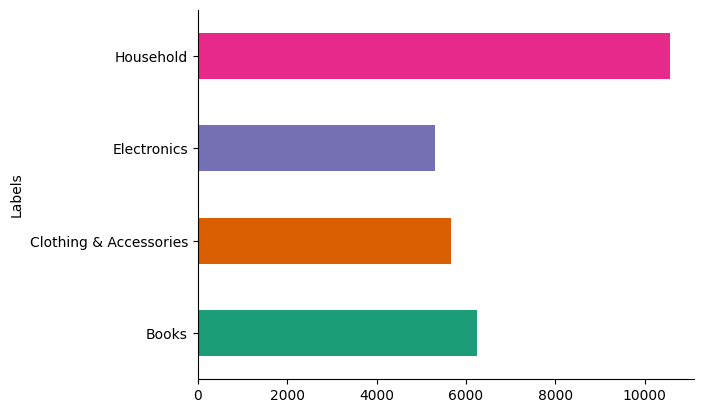

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
#Label Encoding
le = LabelEncoder()
data['Encoded_Labels'] = le.fit_transform(data['Labels'])
#label = data['Encoded_Labels'].unique()
inv_labels = le.inverse_transform([0,1,2,3])
label_len = len(le.classes_)
data.head()

,Labels,Description,Description_Clean,Encoded_Labels
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,paper plane design frame wall hang motivationa...,3
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",saf frame paint wood inch kiss inch special ef...,3
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,saf texture modern art print frame paint synth...,3
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",saf flower print frame paint synthetic inch ki...,3
4,Household,Incredible Gifts India Wooden Happy Birthday U...,incredible gift india wooden happy birthday un...,3


In [18]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    data.Description_Clean,
    data.Encoded_Labels,
    stratify=data.Encoded_Labels,
    random_state=100)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

#### LSTM Input:
- **batch_size:** The number of sequences you feed into the model at once. It's a hyperparameter that you specify when training and represents the number of samples that are processed in parallel during each training iteration. For example, if your batch size is 32, then you'll process 32 sequences at a time.
- **sequence_length:** The length of each input sequence. This value is determined by the padding you applied to make all sequences the same length. If your maximum sequence length is, for instance, 50 (meaning all sequences are padded/truncated to 50 tokens), then sequence_length would be 50.
- **embedding_dim:** The dimensionality of the word embeddings used to represent each token in the sequence. This is the length of the dense vectors used to represent words. It's a hyperparameter that you set based on your problem and the size of your dataset. For instance, you might choose an embedding_dim of 100 or 300

In [19]:
#Processing Data for DL
batch_size = 64
max_words = 10000
max_len = 200
embedding_dim = 100
lstm_units = 64

In [20]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [21]:
seq_matrix[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [22]:
#LSTM Model
def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_labels, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [23]:
model = LSTM_Model(max_words,max_len,embedding_dim,lstm_units,label_len)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
#Train Model
model.fit(seq_matrix,
y_train,
epochs=5,
batch_size=batch_size,
validation_split=0.20)

Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 111s 395ms/step - accuracy: 0.6407 - loss: 0.8782 - val_accuracy: 0.9259 - val_loss: 0.2661
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 96s 368ms/step - accuracy: 0.9434 - loss: 0.2131 - val_accuracy: 0.9451 - val_loss: 0.2148
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 142s 369ms/step - accuracy: 0.9563 - loss: 0.1733 - val_accuracy: 0.9422 - val_loss: 0.2204
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 143s 372ms/step - accuracy: 0.9686 - loss: 0.1247 - val_accuracy: 0.9389 - val_loss: 0.2297
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 143s 375ms/step - accuracy: 0.9784 - loss: 0.0937 - val_accuracy: 0.9396 - val_loss: 0.2439


In [26]:
#Test Model
prediction = model.predict(test_seq_matrix)

218/218 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, np.argmax(prediction,axis=1), target_names=inv_labels))

                        precision    recall  f1-score   support

                 Books       0.94      0.93      0.93      1564
Clothing & Accessories       0.97      0.97      0.97      1419
           Electronics       0.92      0.94      0.93      1327
             Household       0.95      0.94      0.94      2641

              accuracy                           0.94      6951
             macro avg       0.94      0.94      0.94      6951
          weighted avg       0.94      0.94      0.94      6951



<Axes: >

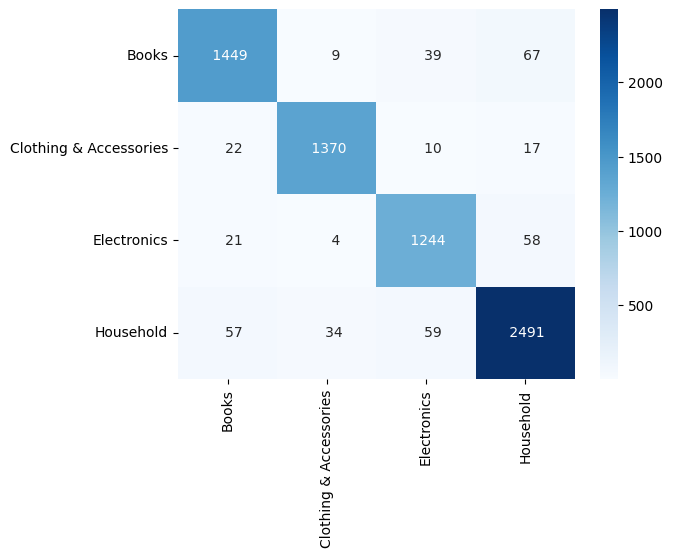

In [31]:
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction,axis=1)),
            annot=True,fmt='5',cmap='Blues',xticklabels=inv_labels,
            yticklabels=inv_labels)

### Results Analysis:

- **Strong Performance**: The model performs well in predicting Household items, as seen by the 2491 correct predictions. This category shows the highest accuracy, indicating the model's strong ability to correctly classify household-related products.
Similarly, Books and Clothing & Accessories also have relatively high correct predictions, with 1449 and 1370 respectively, showing the model handles these categories effectively.
- **Moderate Confusion**: There is some confusion between Books and Electronics, as the model incorrectly predicts 39 Books as Electronics and 58 Electronics as Household. While the misclassification is present, it’s relatively low compared to the total correct predictions.
- **Minimal Errors**: Misclassifications between categories like Clothing & Accessories and other categories (e.g., Electronics, Household) are very minimal (around 10-34 misclassified instances), indicating that these categories are generally well distinguished by the model.

### Conclusion:
The model overall performs well across the different categories, especially for Household and Books, where most predictions are correct. There is some minor confusion between categories like Electronics and Books, but the impact of these errors is limited. Overall, the model demonstrates a strong ability to classify product categories based on the input data, with room for slight improvements in reducing cross-category confusion.

This experiment shows that LSTM is suitable for a variety of natural language processing (NLP) tasks, including text classification, sentiment analysis, and language modeling.